# quant-econ Solutions: Finite Markov Chains

Solutions for http://quant-econ.net/py/finite_markov.html

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function, division  # Omit for Python 3.x
import numpy as np
import matplotlib.pyplot as plt
from quantecon import mc_compute_stationary, mc_sample_path


## Exercise 1


Compute the fraction of time that the worker spends unemployed,
and compare it to the stationary probability.


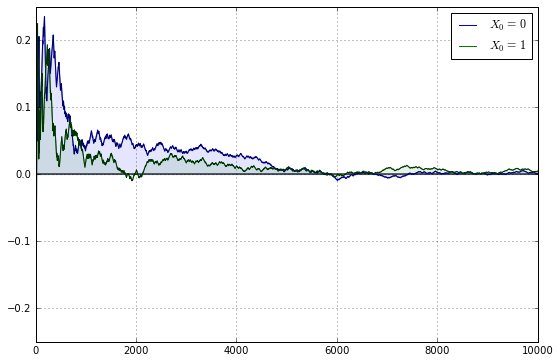

In [3]:

alpha = beta = 0.1
N = 10000
p = beta / (alpha + beta)

P = ((1 - alpha, alpha),   # Careful: P and p are distinct
     (beta, 1 - beta))
P = np.array(P)

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)  # Horizonal line at zero

for x0, col in ((0, 'blue'), (1, 'green')):
    # == Generate time series for worker that starts at x0 == #
    X = mc_sample_path(P, x0, N)
    # == Compute fraction of time spent unemployed, for each n == #
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float)) 
    # == Plot == #
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=col, alpha=0.1)
    ax.plot(X_bar - p, color=col, label=r'$X_0 = \, {} $'.format(x0))
    ax.plot(X_bar - p, 'k-', alpha=0.6)  # Overlay in black--make lines clearer

ax.legend(loc='upper right')



## Exercise 2

First save the data into a file called `web_graph_data.txt` by executing the next cell

In [4]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;


Overwriting web_graph_data.txt


In [5]:
"""
Return list of pages, ordered by rank
"""
import numpy as np
from operator import itemgetter
import re

infile = 'web_graph_data.txt'
alphabet = 'abcdefghijklmnopqrstuvwxyz'

n = 14 # Total number of web pages (nodes)

# == Create a matrix Q indicating existence of links == #
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = np.zeros((n, n), dtype=int)
f = open(infile, 'r')
edges = f.readlines()
f.close()
for edge in edges:
    from_node, to_node = re.findall('\w', edge)
    i, j = alphabet.index(from_node), alphabet.index(to_node)
    Q[i, j] = 1
# == Create the corresponding Markov matrix P == #
P = np.empty((n, n))
for i in range(n):
    P[i,:] = Q[i,:] / Q[i,:].sum()
# == Compute the stationary distribution r == #
r = mc_compute_stationary(P)[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}
# == Print solution, sorted from highest to lowest rank == #
print('Rankings\n ***')
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print('{0}: {1:.4}'.format(name, rank))



Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


## Exercise 3

A solution from the [quantecon library](https://github.com/jstac/quant-econ/tree/master/quantecon)  can be found [here](https://github.com/jstac/quant-econ/blob/master/quantecon/markov/approximation.py)
